Data wrangling for the weather-airports project.

Part 1b: Flight data. Does not require Part 1a to run.

Flight data (URL subject to change): https://www.transtats.bts.gov/Tables.asp?DB_ID=120&DB_Name=Airline%20On-Time%20Performance%20Data&DB_Short_Name=On-Time

In [1]:
from datetime import timedelta
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
import pytz
import sys
sys.path.append('D:/Springboard_DataSci/Assignments/Lib')
import TimeTracker

save_data = True#; save_data = False #whether to save the resulting data
pd.options.mode.chained_assignment = None #turns off warnings for data replacements

In [2]:
'''Data collection'''
stopwatch = TimeTracker.TimeTracker()
# Get all the data.
path = r'D:\Springboard_DataSci\Capstone_2\data'
os.chdir(path)
print('Importing airline codes')
airline_codes = pd.read_csv('L_UNIQUE_CARRIERS.csv-1.csv', index_col='Code')
airline_codes = pd.Series(airline_codes.Description)
print('Importing flight status files\n')
flightFileNames = glob.glob('????_??_T_ONTIME_REPORTING.csv')
monthly_flights = []
for flightFile in flightFileNames:
    monthly_flights.append(pd.read_csv(flightFile, low_memory=False))

Importing airline codes
Importing flight status files



In [3]:
# Concatenate the files. This is a slow step.
print('\nConcatenating the flight data')
flights = pd.concat(monthly_flights, ignore_index=True)


Concatenating the flight data


In [4]:
# Check for any duplicates.
nRows = len(flights.index)
flights.drop_duplicates(inplace=True)
print('Any duplicates dropped?', len(flights.index)!=nRows, '\n')

Any duplicates dropped? True 



In [5]:
# Verify that departure and arrival times are local using some sample flights.
for i, flights_that_month in enumerate(monthly_flights):
    first_flight = flights_that_month.iloc[0]
    if first_flight.YEAR==2019 and first_flight.MONTH==1:
        break
PHX_ATL_SW = monthly_flights[i][(monthly_flights[i].OP_UNIQUE_CARRIER=='WN') & #Southwest
                        (monthly_flights[i].ORIGIN=='PHX') &
                        (monthly_flights[i].DEST=='ATL')&
                        (monthly_flights[i].DAY_OF_MONTH==22)]
ATL_PHX_SW = monthly_flights[i][(monthly_flights[i].OP_UNIQUE_CARRIER=='WN') &
                        (monthly_flights[i].ORIGIN=='ATL') &
                        (monthly_flights[i].DEST=='PHX')&
                        (monthly_flights[i].DAY_OF_MONTH==29)]

for i, flights_that_month in enumerate(monthly_flights):
    first_flight = flights_that_month.iloc[0]
    if first_flight.YEAR==2019 and first_flight.MONTH==5:
        break
ATL_SLC_DL = monthly_flights[i][(monthly_flights[i].OP_UNIQUE_CARRIER=='DL') & #Delta
                        (monthly_flights[i].ORIGIN=='ATL') &
                        (monthly_flights[i].DEST=='SLC') &
                        (monthly_flights[i].DAY_OF_MONTH==18)]
SLC_ATL_DL = monthly_flights[i][(monthly_flights[i].OP_UNIQUE_CARRIER=='DL') &
                        (monthly_flights[i].ORIGIN=='SLC') &
                        (monthly_flights[i].DEST=='ATL') &
                        (monthly_flights[i].DAY_OF_MONTH==23)]
cols_to_print = ['OP_CARRIER_FL_NUM','ORIGIN','DEST','CRS_DEP_TIME','CRS_ARR_TIME']
print(PHX_ATL_SW[cols_to_print])
print(ATL_PHX_SW[cols_to_print])
print(ATL_SLC_DL[cols_to_print])
print(SLC_ATL_DL[cols_to_print])
# Conclusion: Both departure and arrival times are local.

        OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  CRS_ARR_TIME
500272                491    PHX  ATL           605          1135
500273                988    PHX  ATL          1630          2205
       OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  CRS_ARR_TIME
71962                680    ATL  PHX          1900          2120
71963               3407    ATL  PHX          1050          1320
        OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  CRS_ARR_TIME
337967               1105    ATL  SLC           821          1022
338200               1333    ATL  SLC          1930          2132
338367               1507    ATL  SLC          1225          1421
338890               2076    ATL  SLC          1659          1859
339027               2239    ATL  SLC          2146          2347
339057               2286    ATL  SLC          1350          1550
339072               2302    ATL  SLC          1051          1248
       OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  CRS_ARR_TIME
8291          

In [6]:
print(flights.columns)
print(flights.loc[:,['ORIGIN','DEST']].head())

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'DEST', 'DEST_CITY_NAME', 'CRS_DEP_TIME', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'CRS_ARR_TIME', 'ARR_DELAY_NEW', 'ARR_DEL15', 'CANCELLED',
       'CANCELLATION_CODE', 'DIVERTED', 'WEATHER_DELAY', 'DIV_REACHED_DEST',
       'DIV_ARR_DELAY', 'Unnamed: 23'],
      dtype='object')
  ORIGIN DEST
0    MIA  DCA
1    MIA  DCA
2    MIA  DCA
3    MIA  DCA
4    MIA  DCA


In [7]:
# Choose our airports and filter the dataset. The flights depart from and arrive at one of these airports.
AIRPORTS = ['ATL','JFK','ORD','MIA']
flights = flights[(flights.ORIGIN.isin(AIRPORTS)) & (flights.DEST.isin(AIRPORTS))]
flights.reset_index(inplace=True)
n = len(flights)
print(n)

215470


This reduces the number of flights from over 25 million to just over 210,000.

In [8]:
del(monthly_flights, flights_that_month, first_flight, flightFile, flightFileNames,
    nRows, airline_codes, cols_to_print, PHX_ATL_SW, ATL_PHX_SW, ATL_SLC_DL, SLC_ATL_DL) #no longer needed

In [9]:
# Clean the dataframe.
flights.drop(['index','YEAR','MONTH','DAY_OF_MONTH','DAY_OF_WEEK','OP_UNIQUE_CARRIER',
              'OP_CARRIER_FL_NUM','ORIGIN_CITY_NAME','DEST_CITY_NAME', 'Unnamed: 23'], axis=1, inplace=True)
print("Existing NaNs:\n" + str(flights.isna().sum()))

Existing NaNs:
FL_DATE                   0
ORIGIN                    0
DEST                      0
CRS_DEP_TIME              0
DEP_DELAY_NEW          2943
DEP_DEL15              2943
CRS_ARR_TIME              0
ARR_DELAY_NEW          3543
ARR_DEL15              3543
CANCELLED                 0
CANCELLATION_CODE    212469
DIVERTED                  0
WEATHER_DELAY        171673
DIV_REACHED_DEST     214943
DIV_ARR_DELAY        214961
dtype: int64


In [10]:
# DEP_DELAY_NEW and DEP_DEL15, and ARR_DELAY_NEW and ARR_DEL15, have matching
# NaN counts. Let's investigate this. XOR and EQUIV are defined.
XOR = lambda a, b: (a & ~b) | (~a & b)
EQUIV = lambda a, b: (a & b) | ~(a | b)
departureClashes = XOR(flights.DEP_DELAY_NEW.isna(), flights.DEP_DEL15.isna())
print("Clashes between DEP_DELAY_NEW and DEP_DEL15 NaN's:", departureClashes[departureClashes].count())
arrivalClashes = XOR(flights.ARR_DELAY_NEW.isna(), flights.ARR_DEL15.isna())
print("Clashes between ARR_DELAY_NEW and ARR_DEL15 NaN's:", arrivalClashes[arrivalClashes].count())

# No clashes. Impute missing values as 0.
flights.DEP_DELAY_NEW.fillna(value=0, inplace=True)
flights.ARR_DELAY_NEW.fillna(value=0, inplace=True)
flights.DEP_DEL15.fillna(value=0, inplace=True)
flights.ARR_DEL15.fillna(value=0, inplace=True)

Clashes between DEP_DELAY_NEW and DEP_DEL15 NaN's: 0
Clashes between ARR_DELAY_NEW and ARR_DEL15 NaN's: 0


In [11]:
# Investigate cancellations.
cancellationClashes = XOR(flights.CANCELLED == 0, flights.CANCELLATION_CODE.isna())
print("Clashes between CANCELLED and CANCELLATION_CODE NaN's:",
      cancellationClashes[cancellationClashes].count()) #Again, none.
flights.CANCELLATION_CODE.fillna(value=0, inplace=True)
print('Unique values of flights.CANCELLATION_CODE:\n' + str(flights.CANCELLATION_CODE.value_counts()))
flights['WeatherCancelled'] = (flights.CANCELLATION_CODE == 'B').astype(int)
flights.drop(['CANCELLED','CANCELLATION_CODE'], axis=1, inplace=True)

Clashes between CANCELLED and CANCELLATION_CODE NaN's: 0
Unique values of flights.CANCELLATION_CODE:
0    212469
B      1831
A       600
C       566
D         4
Name: CANCELLATION_CODE, dtype: int64


In [12]:
# Investigate weather delays.
weatherDelayClashes = EQUIV(flights.WEATHER_DELAY.isna(), flights.ARR_DEL15==1)
print("Clashes between flights.WEATHER_DELAY NaN's and ARR_DEL15:",
      weatherDelayClashes[weatherDelayClashes].count()) #None.
flights.WEATHER_DELAY.fillna(value=0, inplace=True)
flights['WeatherDelayed'] = (flights.WEATHER_DELAY >= 15).astype(int)
flights.drop(['DEP_DELAY_NEW','ARR_DELAY_NEW'], axis=1, inplace=True)

Clashes between flights.WEATHER_DELAY NaN's and ARR_DEL15: 0


In [13]:
# See if there is any difference between weather delays on the departure and arrival end.
print(flights.WeatherDelayed.value_counts()[1])
print((flights.WeatherDelayed * flights.ARR_DEL15).value_counts()[1])
print((flights.WeatherDelayed * flights.DEP_DEL15).value_counts()[1]) #All three the same.
flights.drop(['ARR_DEL15','DEP_DEL15'], axis=1, inplace=True)

2679
2679
2679


In [14]:
# Investigate diversions.
print('DIVERTED codes:\n' + str(flights.DIVERTED.value_counts()))
print('DIV_REACHED_DEST codes:\n' + str(flights.DIV_REACHED_DEST.value_counts()))
print('Count of DIV_REACHED_DEST:', flights.DIV_REACHED_DEST.count()) #Same as DIVERTED==1.
div_reached = flights[(flights.DIVERTED==1) & (flights.DIV_REACHED_DEST==1)]
print('WeatherDelayed and WeatherCancelled codes of flights who made their destination:')
print(div_reached.WeatherDelayed.value_counts()) #None
print(div_reached.WeatherCancelled.value_counts()) #None
div_failed = flights[(flights.DIVERTED==1) & (flights.DIV_REACHED_DEST==0)]
print('WeatherDelayed and WeatherCancelled codes of flights who didn\'t:')
print(div_failed.WeatherDelayed.value_counts()) #None
print(div_failed.WeatherCancelled.value_counts()) #None
# Conclusion: None of our flights were diverted due to weather.
flights.drop(['DIVERTED','DIV_REACHED_DEST','DIV_ARR_DELAY'], axis=1, inplace=True)

DIVERTED codes:
0.0    214943
1.0       527
Name: DIVERTED, dtype: int64
DIV_REACHED_DEST codes:
1.0    509
0.0     18
Name: DIV_REACHED_DEST, dtype: int64
Count of DIV_REACHED_DEST: 527
WeatherDelayed and WeatherCancelled codes of flights who made their destination:
0    509
Name: WeatherDelayed, dtype: int64
0    509
Name: WeatherCancelled, dtype: int64
WeatherDelayed and WeatherCancelled codes of flights who didn't:
0    18
Name: WeatherDelayed, dtype: int64
0    18
Name: WeatherCancelled, dtype: int64


In [15]:
# Delete some temporary variables.
del(arrivalClashes, cancellationClashes, departureClashes, weatherDelayClashes,
    div_reached, div_failed)

The next order of business is to deal with the timestamps. We have already
seen from actual flights that the departure and arrival times are local and
in their respective airports timezones. The departure dates are given as strings,
and the departure and arrival times are given as integers.

First, let's denote any flights that cross midnight.

In [16]:
# Convert midnight arrivals/departures to 0000 time.
flights['CRS_DEP_TIME'][flights.CRS_DEP_TIME == 2400] = 0
flights['CRS_ARR_TIME'][flights.CRS_ARR_TIME == 2400] = 0

Looking for any flights that crossed midnight
5255


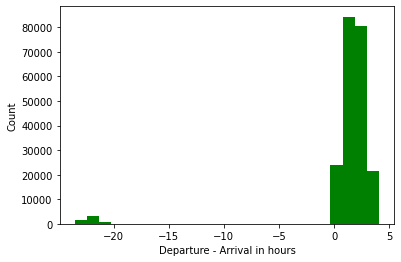

In [17]:
print('Looking for any flights that crossed midnight')
arrDepDiff = flights.CRS_ARR_TIME - flights.CRS_DEP_TIME
print(len(flights[arrDepDiff < 0].index)) #5149 flights. Need more trimming.

plt.figure()
plt.hist(arrDepDiff/100, bins=25, color='g', align='left')
plt.xlabel('Departure - Arrival in hours')
plt.ylabel('Count')
if save_data:
    plt.savefig(r'D:\Springboard_DataSci\Capstone_2\figures\OvernightTimes.png')
plt.show()

There is a clear gap between -20 and 0. Large negative values are probably flights that cross
midnight. Note that there are no flights in the -1 or -2 bins, which would indicate flights that have
arrival times in the local time zone earlier than the departure time. Among our four airports, only flights
to Chicago would have this issue, and none of them do.

In [18]:
flights['Overnight'] = (arrDepDiff < 0)

# Let's do a time check.
print('Elapsed time prior to datetime calculations:', stopwatch.getElapsedTime())

Elapsed time prior to datetime calculations: --- 3.18 minutes ---


In [19]:
# Converting dates to datetime objects. Slow step (but not as slow as it used to be!)
print('Converting dates to datetime objects')
flights['DepartureTime'] = pd.to_datetime(flights.FL_DATE + flights.apply(
    lambda row:'%04d' % row['CRS_DEP_TIME'], axis=1), format='%Y-%m-%d%H%M')

Converting dates to datetime objects


In [20]:
print('Converting arrival dates to datetime objects')
flights['ArrivalTime'] = pd.to_datetime(flights.FL_DATE + flights.apply(
    lambda row:'%04d' % row['CRS_ARR_TIME'], axis=1), format='%Y-%m-%d%H%M')

Converting arrival dates to datetime objects


In [21]:
print('Factoring in redeye data for arrivals')
flights['ArrivalTime'] += flights['Overnight'].apply(lambda x: timedelta(days=x))

# Drop some columns that are no longer needed.
flights.drop(['FL_DATE','CRS_DEP_TIME','CRS_ARR_TIME','Overnight'], axis=1, inplace=True)

Factoring in redeye data for arrivals


In [22]:
# Get the timezones to make the times compatible in the upcoming merges.
def getTimeZone(df, field):
    timeZones = []
    for airport in df[field]:
        for zone, zoneAirports in timeZoneMap.items():
            if airport in zoneAirports:
                timeZones.append(zone)
                break
        else:
            raise ValueError(airport + ' not listed in the time zone map')
    return timeZones

In [23]:
timeZoneMap = {'US/Eastern':['ATL','JFK','MIA'],
               'US/Central':['ORD']}
AirportsWithTimeZones = pd.DataFrame({'Airport':AIRPORTS})
AirportsWithTimeZones['TimeZone'] = getTimeZone(AirportsWithTimeZones, field='Airport')
AirportsWithTimeZones = AirportsWithTimeZones.set_index('Airport')['TimeZone']
timeZoneMap = AirportsWithTimeZones.map(pytz.timezone)

In [24]:
# Set the departure and arrival times to their cities' respective time zones.
flights = flights.merge(timeZoneMap, left_on='ORIGIN', right_on='Airport')
flights.columns = ['Departure_TZ' if col=='TimeZone' else col for col in flights.columns]
flights = flights.merge(timeZoneMap, left_on='DEST', right_on='Airport')
flights.columns = ['Arrival_TZ' if col=='TimeZone' else col for col in flights.columns]

In [25]:
print('Localizing departures to their respective time zones')
flights['DepartureTime'] = flights.apply(
    lambda row: row['DepartureTime'].tz_localize(row['Departure_TZ']), axis=1)
print('Localizing arrivals to their respective time zones')
flights['ArrivalTime'] = flights.apply(
    lambda row: row['ArrivalTime'].tz_localize(row['Arrival_TZ']), axis=1)

Localizing departures to their respective time zones
Localizing arrivals to their respective time zones


In [26]:
# Save the data and proceed to merging them.
flights.drop(['Departure_TZ','Arrival_TZ'], axis=1, inplace=True)
if save_data:
    print('Saving data')
    flights.to_csv('flights.csv')
print('Total runtime:', stopwatch.getElapsedTime())

Saving data
Total runtime: --- 4.09 minutes ---
